## Start Here

In [431]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import imshow

In [432]:
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

def read_img(path):
    """
    Read image and store it as an array, given the image path. 
    Returns the 3 dimensional image array.
    """
    img = Image.open(path)
    img_arr = np.array(img, dtype='int32')
    img.close()
    return img_arr

def display_image(arr):
    """
    display the image
    input : 3 dimensional array
    """
    arr = arr.astype(dtype='uint8')
    img = Image.fromarray(arr, 'RGB')
    imshow(np.asarray(img))
    



# Insert the image path : 

The results in the report are not all reflected in the code below. I am on;y displaying the code for the tropical image:

In [441]:
img_arr= read_img("/Users/sawid/Documents/CDA_Files/tropical.jpeg")

img_arr_football = read_img("/Users/sawid/Downloads/homework1/data/football.bmp")
img_arr_beach= read_img("/Users/sawid/Downloads/homework1/data/beach.bmp")

# display_image(img_arr)

r, c, l = img_arr.shape
img_reshaped = np.reshape(img_arr, (r*c, l), order="C")

## Run the code below

Below are the building blocks for functions that we are going to call later 


In [435]:
# please note that some of the code was retrived from my CSE 6040 assignment in Spring 2020
def init_centers(X, k):
    from numpy.random import choice
    samples = choice(len(X), size=k, replace=False)
    return X[samples, :]

def compute_d2(X, centers): 
    m = len(X)
    k = len(centers)
    
    S = np.empty((m, k))
    for i in range(m): # 1 by 3 - 3 by 3
        d_i = np.linalg.norm(X[i, :] - centers, ord=2, axis=1)
#         d_i = np.linalg.norm(X[i, :] - centers, ord=2, axis=0)

        S[i, :] = d_i**2
    return S
def compute_distance_med (X, centers): 
    m = len(X)
    size= centers.shape
    k=len(centers)
    if len(size) == 1: 
        centers = centers.reshape((1,len(centers)))
    
    S = np.empty((m, k))
    for i in range(m): # 1 by 3 - 3 by 3
#         d_i = np.linalg.norm(X[1, :] - centers, ord=2, axis=1)
        d_i = np.linalg.norm(X[i, :] - centers, ord=2, axis=1)

        S[i, :] = d_i**2
    return S
def assign_cluster_labels(S):
    return np.argmin(S, axis=1)

def update_centers(X, y):
    # X[:m, :d] == m points, each of dimension d
    # y[:m] == cluster labels
    m, d = X.shape
    k = max(y) + 1
    assert m == len(y)
    assert (min(y) >= 0)
    
    centers = np.empty((k, d))
    for j in range(k):
        # Compute the new center of cluster j,
        # i.e., centers[j, :d].
        centers[j, :d] = np.mean(X[y == j, :], axis=0)
    return centers


    
def WCSS(S):
    ### BEGIN SOLUTION
    return np.sum(np.amin(S, axis=1)) 
    ### END SOLUTION

def has_converged(old_centers, centers):
    return set([tuple(x) for x in old_centers]) == set([tuple(x) for x in centers])

This is the function that assigns medoids as centers:

In [436]:
def swap_centers_all(X,y, old_centers):
    k=max(y)+1
     
    current_centers = old_centers

    for j in range(k):
        current_cluster=X[y==j,:]
        s,d=current_cluster.shape
        
        sample=random.sample(range(s), int(s*0.002)) # to fix slow performance 
        old_distance=np.sum(compute_distance_med(current_cluster, current_centers[j]))
        for m in current_cluster[sample,]:
            new_center=m
            new_distance=np.sum(compute_distance_med(current_cluster, new_center))
            if old_distance>new_distance:
                old_distance=new_distance
                current_centers[j]=m
        return current_centers

Bring it all together for kmeans and kmedoids :

In [437]:
import random
random.seed(100)
def kmeans(X, k, starting_centers=None, max_steps=None):
    if starting_centers is None:
        centers = init_centers(X, k) #assign random cluster centers
    else: 
        centers=starting_centers
    if max_steps is None:
        max_steps=10
    else:
        max_steps
    converged = False
    labels = np.zeros(len(X))
    i = 1
    cost=list()
    while (not converged) and (i <= max_steps):
        old_centers = centers
        ### BEGIN SOLUTION
        S = compute_d2(X, centers) #compute the distance matrix
        labels = assign_cluster_labels(S) # assign cluster center based on S
        centers = update_centers(X, labels) # update centers based on mean calculation 
        #converged = has_converged(old_centers, centers) # converged? yes > stop 
        ### END SOLUTION
        cost.append(WCSS(S))
        if  cost[i-1]/cost[i-2] <0.7:
              converge=True
        print ("iteration", i, "WCSS = ", WCSS (S))
        i += 1
    return labels, centers



In [444]:
import random
random.seed(100)
def Kmed (X, k,  starting_centers=None, max_steps=None):
    centers=init_centers(X,k)
    print(len(centers))
    labels=np.zeros(len(X))
    converged=False
    if max_steps is None:
        max_steps=10
    else:
        max_steps
    i=1
    cost=list()

# All the program statements
    
    while (not converged and i<= max_steps) :
        
        old_centers=centers
        S=compute_d2(X,centers) # compute distance matrix
        labels=assign_cluster_labels(S) # assign cluster labels based on min d2 in S
        centers=swap_centers_all(X, labels,old_centers)
#         converged=has_converged(old_centers, centers)

#         print(S.shape)
        print ("iteration", i, "WCSS = ", WCSS (S))
        cost.append(WCSS(S))
        if  cost[i-1]/cost[i-2] <0.7: # if the variation within clusters is reduced by 70% then Stop
            converged= True
#         elif i> max_steps:
#         converged=has_converged(old_centers, centers) # if the WCSS variation is not improving then check centers

        i+=1
#         print(cost)
    return labels, centers
    

## K- medoids Results K=3

In [445]:
%%time
# labels, centers, S = Kmed(img_reshaped, 3, img_reshaped[0:3,], 10)
class_, centroid= Kmed(img_reshaped, 3, None, 10)

3
iteration 1 WCSS =  117773982.0
iteration 2 WCSS =  110571059.0
iteration 3 WCSS =  109252465.0
iteration 4 WCSS =  109252465.0
iteration 5 WCSS =  109252465.0
iteration 6 WCSS =  109252465.0
iteration 7 WCSS =  109252465.0
iteration 8 WCSS =  109252465.0
iteration 9 WCSS =  109252465.0
iteration 10 WCSS =  109252465.0
CPU times: user 26.4 s, sys: 482 ms, total: 26.9 s
Wall time: 29.7 s


[[ 39  93 181]
 [ 39  93 181]
 [ 39  93 181]
 ...
 [228 232 235]
 [228 232 235]
 [228 232 235]]


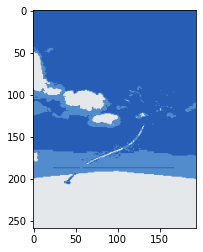

In [446]:

img_clustered = np.array([centroid[i] for i in class_])
print(img_clustered)
r, c, l = img_arr.shape
img_disp = np.reshape(img_clustered, (r, c, l), order="C")
display_image(img_disp)

## K- means Results K=3

In [447]:
%%time

# labels_km,centers_km = kmeans(img_reshaped, 3, img_reshaped[0:3,], 10)
class_km,centroid_km = kmeans(img_reshaped, 3, None, 10)


iteration 1 WCSS =  422569518.0
iteration 2 WCSS =  96280795.22740209
iteration 3 WCSS =  64558796.39374731
iteration 4 WCSS =  62282369.71222348
iteration 5 WCSS =  61933832.90415873
iteration 6 WCSS =  61900318.73622334
iteration 7 WCSS =  61897796.02139767
iteration 8 WCSS =  61897618.69421489
iteration 9 WCSS =  61897581.604298554
iteration 10 WCSS =  61897577.50869264
CPU times: user 7.73 s, sys: 98.5 ms, total: 7.83 s
Wall time: 8.18 s


[[ 32.06559984  66.72388431 145.01391512]
 [ 32.06559984  66.72388431 145.01391512]
 [ 32.06559984  66.72388431 145.01391512]
 ...
 [194.08769801 216.40763924 231.7323071 ]
 [194.08769801 216.40763924 231.7323071 ]
 [194.08769801 216.40763924 231.7323071 ]]


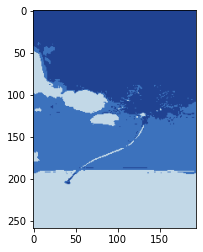

In [448]:
img_clustered_k = np.array([centroid_km[i] for i in class_km])
print(img_clustered_k)
r, c, l = img_arr.shape
img_disp = np.reshape(img_clustered_k, (r, c, l), order="C")
display_image(img_disp)

## Kmed K=15


In [ ]:
class_, centroid= Kmed(img_reshaped, 15, None, 10)

img_clustered = np.array([centroid[i] for i in class_])
print(img_clustered)
r, c, l = img_arr.shape
img_disp = np.reshape(img_clustered, (r, c, l), order="C")
display_image(img_disp)

## Kmeans K=15


In [ ]:
%%time

# labels_km,centers_km = kmeans(img_reshaped, 3, img_reshaped[0:3,], 10)
class_km,centroid_km = kmeans(img_reshaped, 15, None, 10)

img_clustered_k = np.array([centroid_km[i] for i in class_km])
print(img_clustered_k)
r, c, l = img_arr.shape
img_disp = np.reshape(img_clustered_k, (r, c, l), order="C")
display_image(img_disp)

## Kmed - Poor assignment Initial Centers:

3
iteration 1 WCSS =  462453601.0
iteration 2 WCSS =  121794760.0
[[ 43  88 181]
 [ 43  88 181]
 [ 43  88 181]
 ...
 [190 219 237]
 [190 219 237]
 [190 219 237]]
CPU times: user 20.3 s, sys: 357 ms, total: 20.7 s
Wall time: 22.3 s


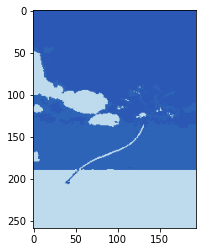

In [449]:
%%time
class_, centroid = Kmed(img_reshaped, 3, img_reshaped[0:3,], 10)

img_clustered = np.array([centroid[i] for i in class_])
print(img_clustered)
r, c, l = img_arr.shape
img_disp = np.reshape(img_clustered, (r, c, l), order="C")
display_image(img_disp)



## Kmeans- Poor assignment Initial Centers:

iteration 1 WCSS =  1224193268.0
iteration 2 WCSS =  578824610.2322971
iteration 3 WCSS =  578824610.2322971
iteration 4 WCSS =  578824610.2322971
iteration 5 WCSS =  578824610.2322971
iteration 6 WCSS =  578824610.2322971
iteration 7 WCSS =  578824610.2322971
iteration 8 WCSS =  578824610.2322971
iteration 9 WCSS =  578824610.2322971
iteration 10 WCSS =  578824610.2322971
iteration 1 WCSS =  182089958.0
iteration 2 WCSS =  64122727.72593448
iteration 3 WCSS =  62139747.55294011
iteration 4 WCSS =  61921195.95721971
iteration 5 WCSS =  61898481.730139345
iteration 6 WCSS =  61897643.68157032
iteration 7 WCSS =  61897583.86127598
iteration 8 WCSS =  61897576.11226535
iteration 9 WCSS =  61897576.11226535
iteration 10 WCSS =  61897576.11226535
[[ 32.06559984  66.72388431 145.01391512]
 [ 32.06559984  66.72388431 145.01391512]
 [ 32.06559984  66.72388431 145.01391512]
 ...
 [194.08769801 216.40763924 231.7323071 ]
 [194.08769801 216.40763924 231.7323071 ]
 [194.08769801 216.40763924 231.7

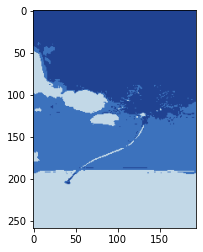

In [450]:
%%time

labels_km,centers_km = kmeans(img_reshaped, 3, img_reshaped[0:3,], 10)
class_km,centroid_km = kmeans(img_reshaped, 3, None, 10)

img_clustered_k = np.array([centroid_km[i] for i in class_km])
print(img_clustered_k)
r, c, l = img_arr.shape
img_disp = np.reshape(img_clustered_k, (r, c, l), order="C")
display_image(img_disp)